# import modules

In [59]:
from lib.preprocess import load_data
from lib.local_utils import plot_activity
import copy
import numpy as np

# load data

In [60]:
# Same labels will be reused throughout the program
LABELS = ["Downstairs", "Jogging", "Sitting", "Standing", "Upstairs", "Walking"]
# The number of steps within one time segment
TIME_PERIODS = 80
# The steps to take from one segment to the next; if this value is equal to
# TIME_PERIODS, then there is no overlap between the segments
STEP_DISTANCE = 40
# x, y, z acceleration as features
N_FEATURES = 3
# Define column name of the label vector
LABEL = "ActivityEncoded"
# set random seed
SEED = 314

SAMPLING_RATE = 20

x_train, x_test, y_train, y_test = load_data(
    LABELS, TIME_PERIODS, STEP_DISTANCE, LABEL, N_FEATURES, SEED
)

In [61]:
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
print(x_train.shape[0], "training samples")
print(x_test.shape[0], "testing samples")

x_train shape: (19217, 80, 3) y_train shape: (19217, 6)
19217 training samples
8237 testing samples


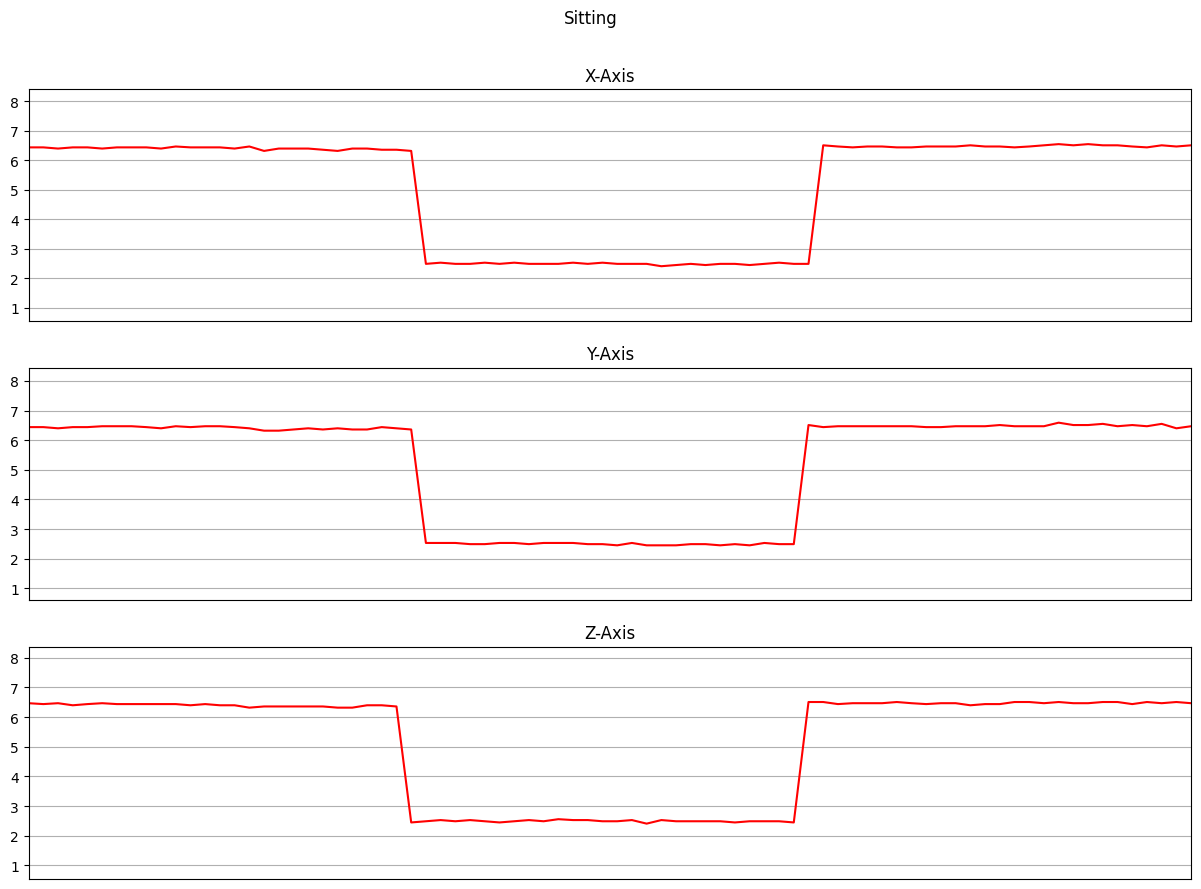

In [62]:
plot_activity(LABELS[np.argmax(y_train[0])], x_train[0])

# differential

In [77]:
def differential(data):
    inputs = copy.deepcopy(data)
    for i in range(1, len(inputs)):
        inputs[i] = (inputs[i] - inputs[i-1])# / (1/SAMPLING_RATE)
    return inputs

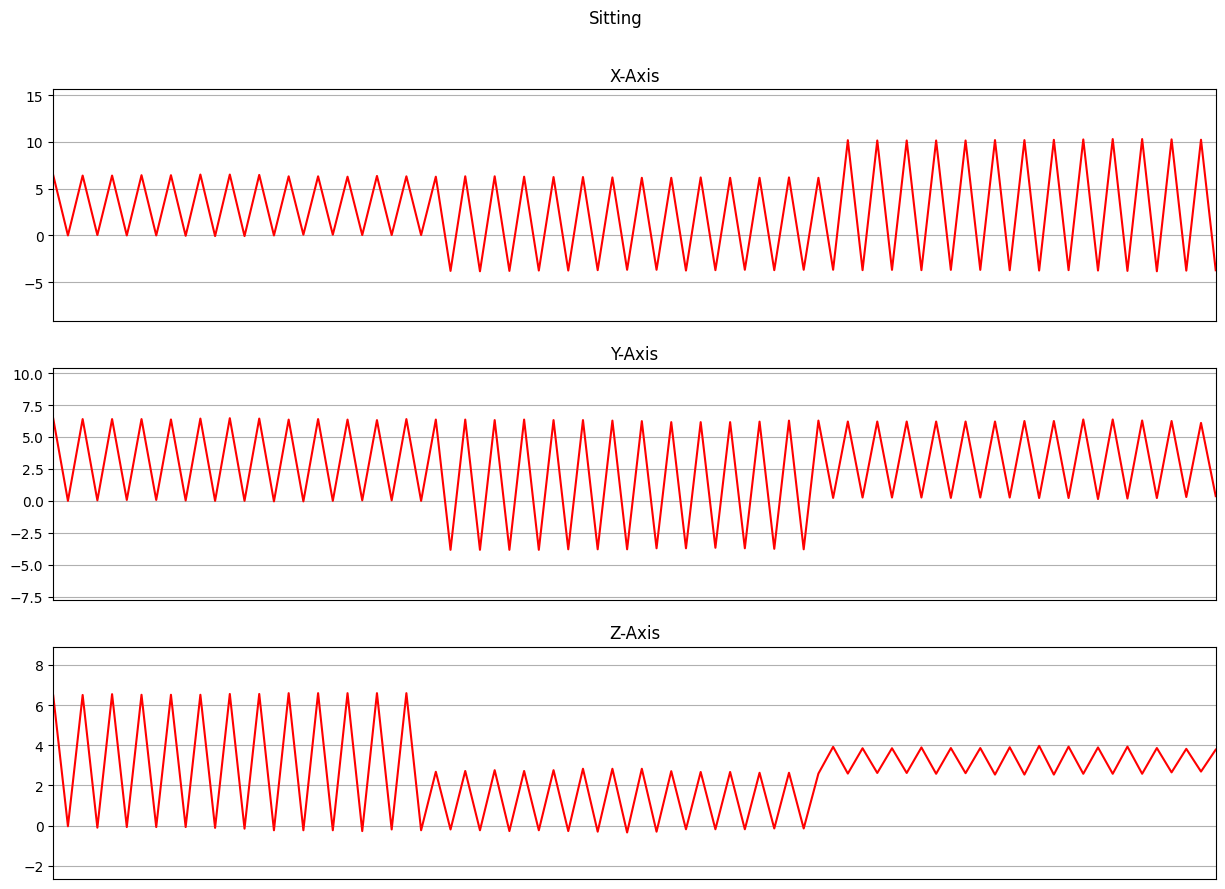

In [78]:
plot_activity(LABELS[np.argmax(y_train[0])], differential(x_train[0]))

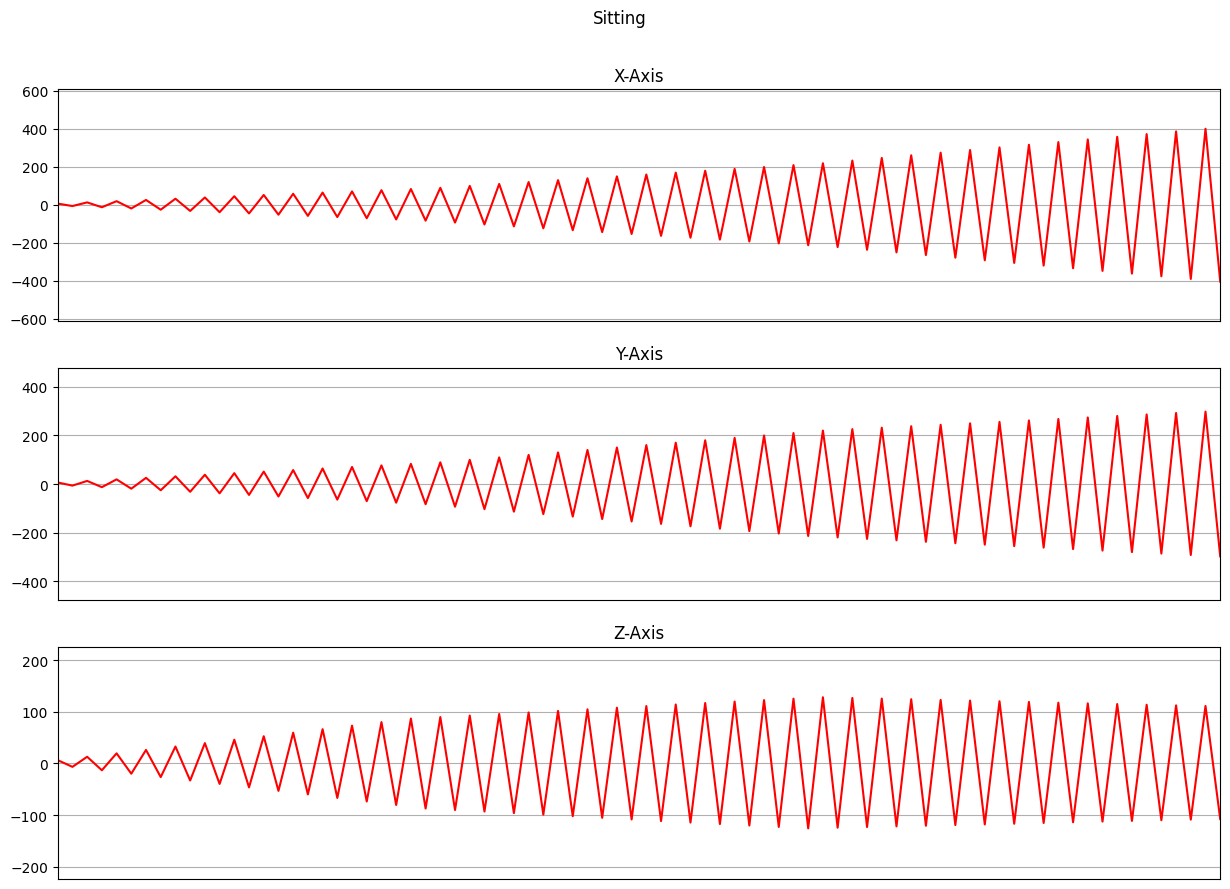

In [65]:
plot_activity(LABELS[np.argmax(y_train[0])], differential(differential(x_train[0])))

# low-pass filtered differential

In [99]:
def low_pass_filter(data, alpha=0.01):
    inputs = copy.deepcopy(data)
    for i in range(1, len(inputs)):
        inputs[i] = alpha * inputs[i-1] + (1-alpha) * inputs[i]
    return inputs

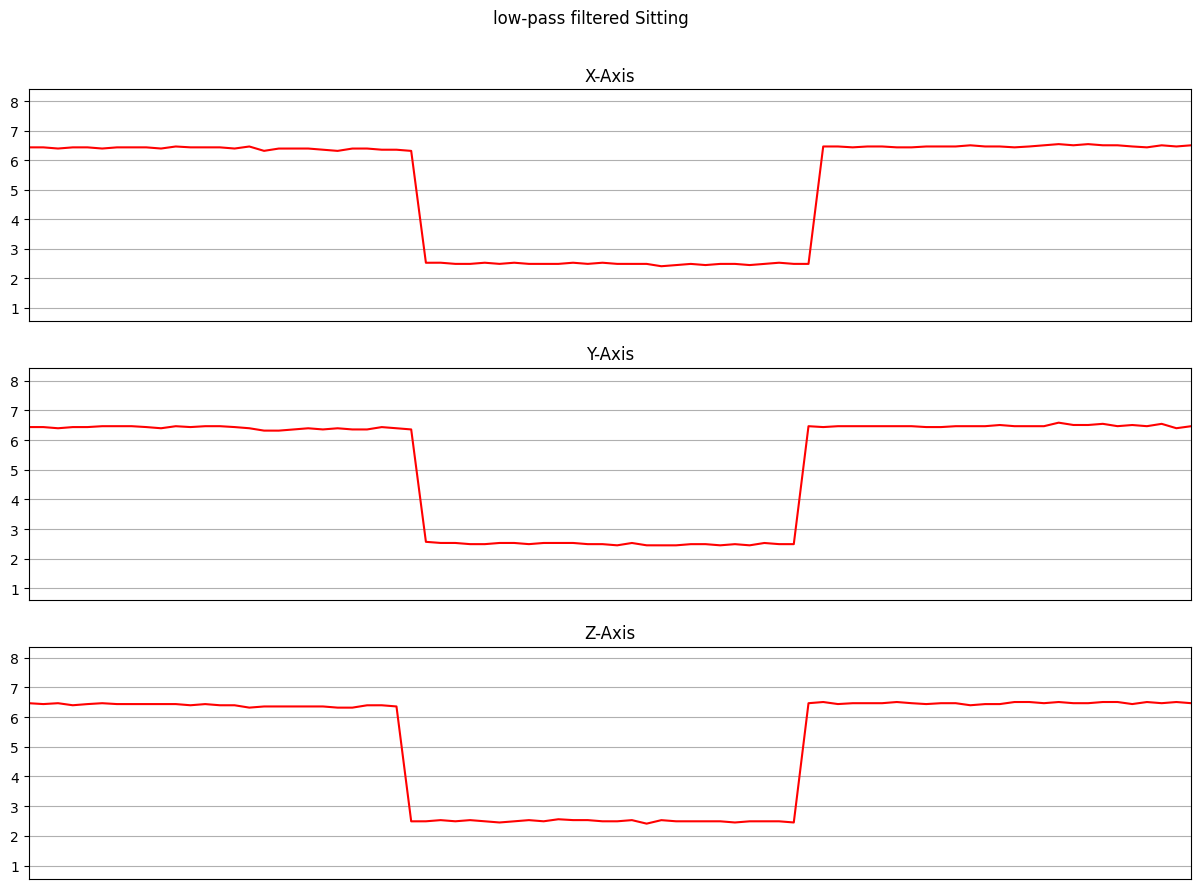

In [100]:
plot_activity(f"low-pass filtered {LABELS[np.argmax(y_train[0])]}", low_pass_filter(x_train[0]))

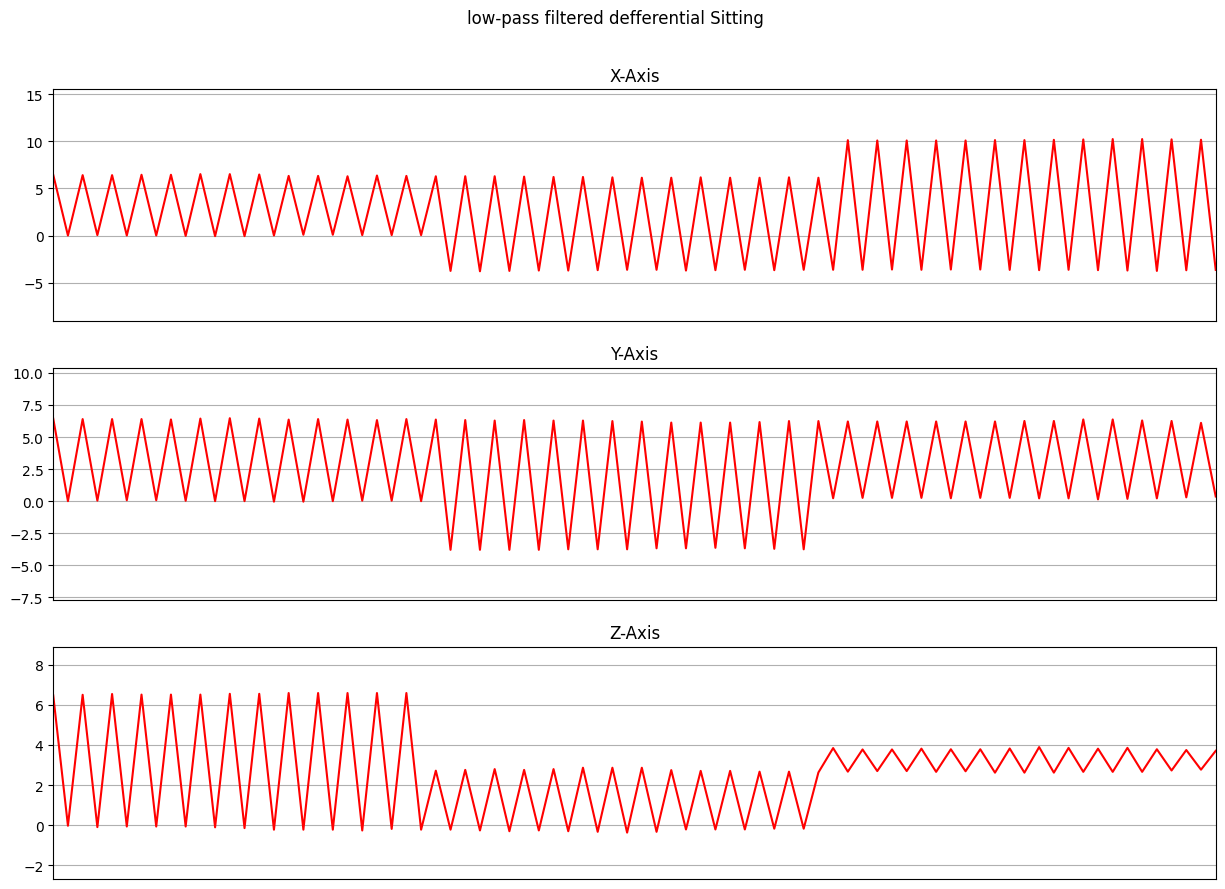

In [101]:
plot_activity(f"low-pass filtered defferential {LABELS[np.argmax(y_train[0])]}", differential(low_pass_filter(x_train[0])))

# integral

In [79]:
def integral(data):
    inputs = copy.deepcopy(data)
    for i in range(1, len(inputs)):
        inputs[i] = (inputs[i-1] + inputs[i])/2 * (1/SAMPLING_RATE)
    return inputs

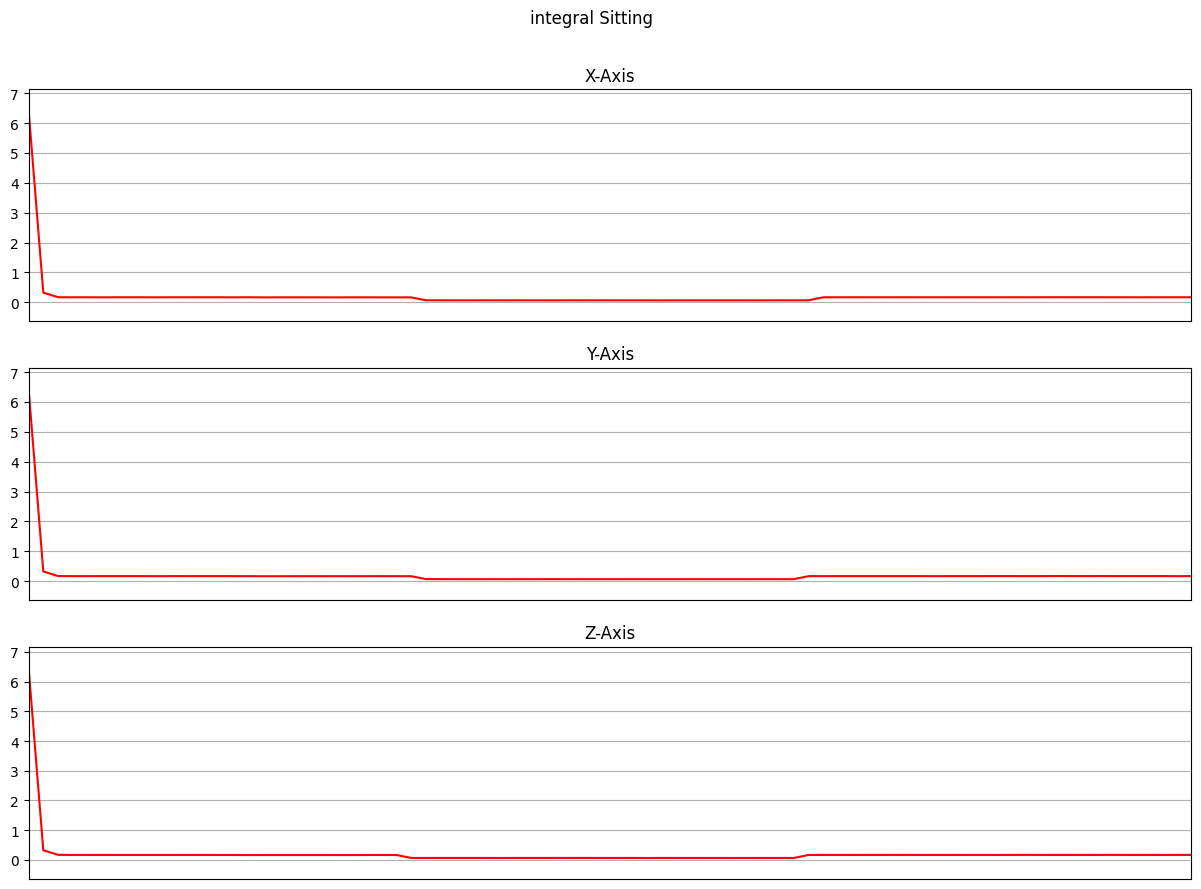

In [83]:
plot_activity(f"integral {LABELS[np.argmax(y_train[0])]}", integral(x_train[0]))

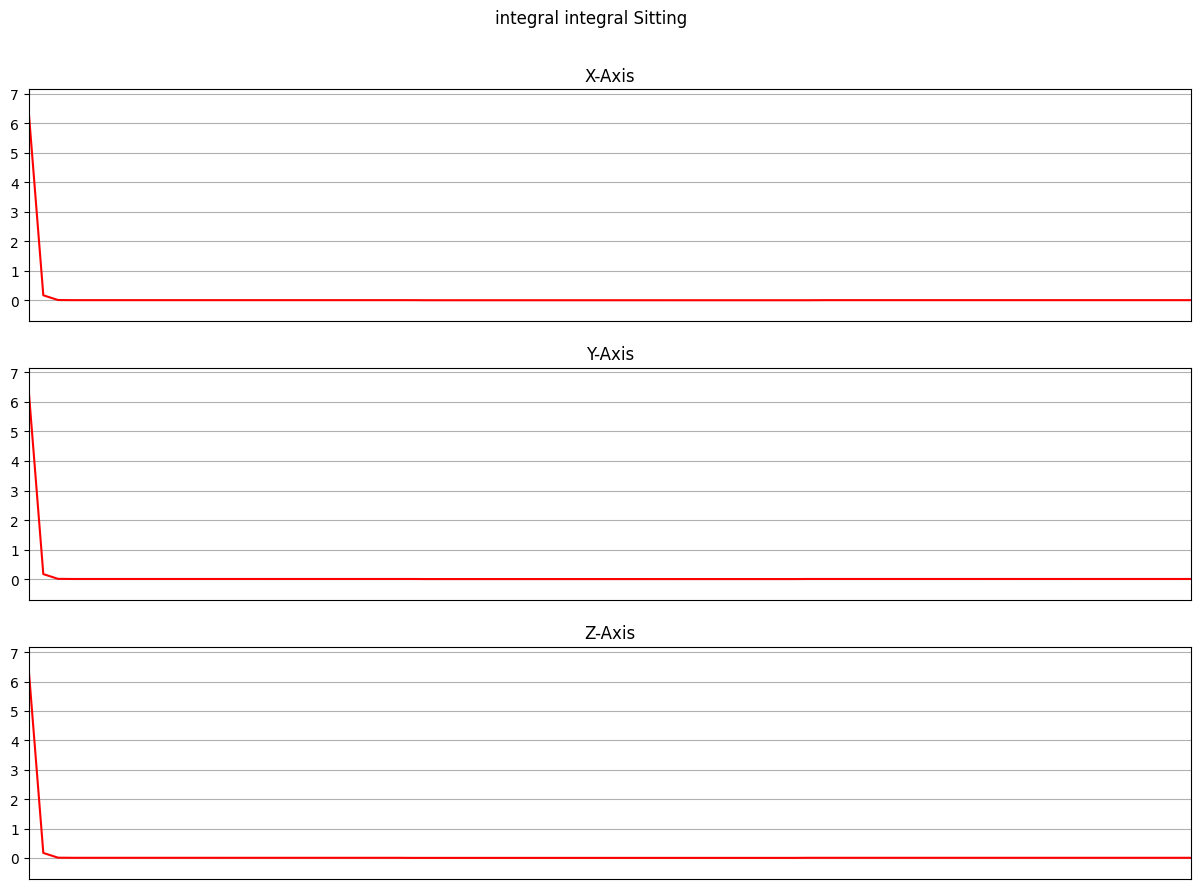

In [84]:
plot_activity(f"integral integral {LABELS[np.argmax(y_train[0])]}", integral(integral(x_train[0])))